In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


 ## Задание

В приложенном файле 3 датасета:

1) Данные треков - Richtracks (описание приложено)

2) Данные точек этих треков - IncomingTrackPoints (описание также приложено)

3) Наборы токен-платформа (iOS или Android)

Задание:

1) Некоторые параметры набора точек для трека имеют различную размерность в 
зависимости от платформы (iOS или Android) - какие это параметры?

2) Переведите все параметры в одинаковую размерность

3) В richtracks для каждого трека есть поле TrackOrigin, которое описывает кем была произведена поездка: владельцем смартфона или нет. Задание: постройте модель, предсказывающую на основании данных из входящих точек, была ли поездка пассажирской или нет.

In [2]:
inc_points = pd.read_csv("inc_points_2.csv")

In [3]:
rich_tracks = pd.read_csv("rich_tracks_2.csv")

In [4]:
os = pd.read_csv("os.csv")

In [5]:
inc_points.shape

(3791240, 12)

In [6]:
rich_tracks.shape

(4000, 64)

In [7]:
os.shape

(4416, 2)

In [82]:
inc_points.head()

,IncomingTrackId,Speed,Latitude,Longitude,PointDate,Height,Acceleration,Deceleration,TickTimestamp,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal
0,20702795,0.0,55.863077,52.227935,2019-10-17 15:35:23.0000000 +03:00,98084.0,0.0,0.0,1571315732,0.829803,0.322861,-0.154434
1,20702795,0.0,55.863077,52.227935,2019-10-17 15:35:23.0000000 +03:00,98084.0,0.0,0.0,1571315733,0.716080,0.612228,-0.168091
2,20702795,0.0,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.0,0.0,1571315734,0.913208,0.488998,0.308365
3,20702795,0.0,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.0,0.0,1571315735,0.930328,0.396133,-0.145203
4,20702795,0.0,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.0,0.0,1571315736,0.887436,0.647537,0.245926


In [63]:
inc_points.corr()

,IncomingTrackId,Speed,Latitude,Longitude,Height,Acceleration,Deceleration,TickTimestamp,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal
IncomingTrackId,1.000000,0.017130,-0.028739,0.032426,-0.012282,-0.053833,-0.046845,0.933136,0.034118,-0.019136,-0.059927
Speed,0.017130,1.000000,-0.023884,-0.001227,0.034605,0.092076,0.096790,-0.006424,0.025105,0.035769,0.021185
Latitude,-0.028739,-0.023884,1.000000,-0.835926,0.176165,0.040864,0.025882,0.046093,-0.025333,0.044515,0.013475
Longitude,0.032426,-0.001227,-0.835926,1.000000,-0.279864,-0.037801,-0.025496,-0.036498,0.005762,-0.052190,-0.037024
Height,-0.012282,0.034605,0.176165,-0.279864,1.000000,0.005819,0.008951,0.008245,0.037073,0.069585,0.082062
Acceleration,-0.053833,0.092076,0.040864,-0.037801,0.005819,1.000000,0.726273,-0.040345,0.123520,0.052594,0.023494
Deceleration,-0.046845,0.096790,0.025882,-0.025496,0.008951,0.726273,1.000000,-0.028277,0.130994,0.047056,0.071674
TickTimestamp,0.933136,-0.006424,0.046093,-0.036498,0.008245,-0.040345,-0.028277,1.000000,0.051828,0.015127,-0.014535
AccelerationXOriginal,0.034118,0.025105,-0.025333,0.005762,0.037073,0.123520,0.130994,0.051828,1.000000,0.010849,0.008252
AccelerationYOriginal,-0.019136,0.035769,0.044515,-0.052190,0.069585,0.052594,0.047056,0.015127,0.010849,1.000000,0.192397


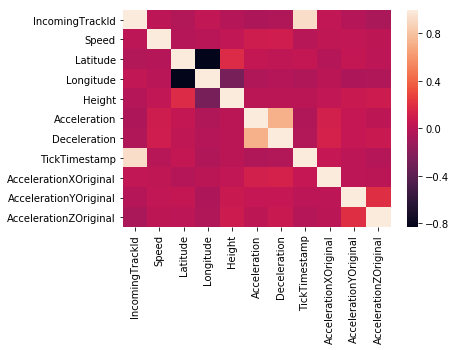

In [64]:
sns.heatmap(inc_points.corr())

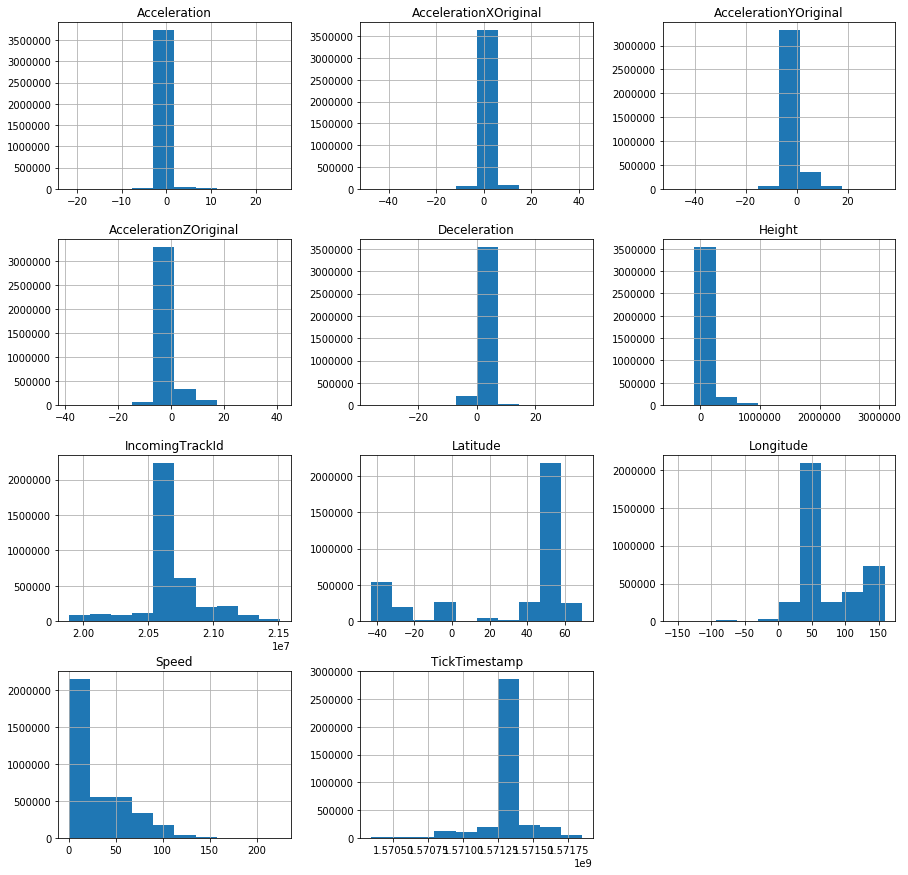

In [67]:
inc_points.hist(figsize=(15, 15));

In [9]:
rich_tracks.head()

,Id,TrackToken,DeviceToken,IncomingTrackId,StartDate,EndDate,Distance,Duration,AccelerationCount,DecelerationCount,...,CorneringDuration,AccelerationICount,DecelerationICount,AccelerationIDuration,DecelerationIDuration,RatingCornering,VehicleId,BeaconId,DeviationRatio,DeviationMeters
0,5148865,AB70A2A9-B45C-453D-B07C-C2D9E9D7442B,3E045058-A9A5-4442-A2CC-605B871C4B2C,20702795,2019-10-17 15:35:34.0000000 +03:00,2019-10-17 15:46:05.0000000 +03:00,4.203323,10.516667,2,1,...,1.0,111.0,6.0,120.0,7.0,NaN,NaN,NaN,0.0,7.390443
1,5148032,4BDD2EE6-FF53-4762-83DA-35A849935A99,669AFC5F-921C-40B9-B090-587BC95D34C2,20691750,2019-10-17 17:35:30.0000000 +05:00,2019-10-17 18:00:56.0000000 +05:00,414.076500,25.433333,0,1,...,0.0,16.0,0.0,29.0,0.0,NaN,NaN,NaN,0.0,17.956039
2,5147957,A0624E01-25FD-4B2D-A56E-617BB2546526,55D0C3A4-9E5B-4B57-BC22-E986158707F8,20690445,2019-10-17 16:35:25.0000000 +04:00,2019-10-17 16:49:04.0000000 +04:00,6.498145,13.650000,0,0,...,0.0,4.0,1.0,63.0,4.0,NaN,NaN,NaN,0.0,18.219858
3,5147902,D233A0EB-2D09-47F3-B0EB-3D852434F982,8E58407D-8933-4AFB-B158-81FF4548AEC4,20689861,2019-10-17 19:35:07.0000000 +07:00,2019-10-17 19:40:59.0000000 +07:00,1.148526,5.866667,0,1,...,0.0,37.0,20.0,51.0,23.0,NaN,NaN,NaN,0.0,5.328696
4,5150087,0195F786-966E-49AF-9326-82697CCC9011,0CE60F80-6BA3-4706-916B-BA864A434F46,20713090,2019-10-17 15:35:03.0000000 +03:00,2019-10-17 16:09:45.0000000 +03:00,8.160865,34.700000,2,1,...,0.0,0.0,31.0,0.0,73.0,NaN,NaN,NaN,0.0,6.391665


In [56]:
os.head()

,DeviceToken,os_version
0,2A768BE9-24E4-4274-AE30-03D07EE1D5B8,Android
1,CA447E48-E1C4-4F06-BA03-35C029C7E0F8,Android
2,EB26DDE2-8C75-439B-8FDA-AE838E15E944,iOS
3,3135D84F-1A08-4CBF-9439-D6C1BA58F4AA,iOS
4,16B59F05-9FEC-40DA-A181-C42B1AA2B517,Android


In [13]:
df = pd.merge(rich_tracks, os, how='inner', on=['DeviceToken'])

In [217]:
temp_df = df[['os_version', 'IncomingTrackId']]

In [219]:
inc_points_w_os = pd.merge(inc_points, temp_df, how='inner', on=['IncomingTrackId'])

In [221]:
inc_points_w_os[inc_points_w_os['os_version'] == 'iOS']

,IncomingTrackId,Speed,Latitude,Longitude,PointDate,Height,Acceleration,Deceleration,TickTimestamp,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal,os_version
0,20702795,0.000,55.863077,52.227935,2019-10-17 15:35:23.0000000 +03:00,98084.0,0.0,0.0,1571315732,0.829803,0.322861,-0.154434,iOS
1,20702795,0.000,55.863077,52.227935,2019-10-17 15:35:23.0000000 +03:00,98084.0,0.0,0.0,1571315733,0.716080,0.612228,-0.168091,iOS
2,20702795,0.000,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.0,0.0,1571315734,0.913208,0.488998,0.308365,iOS
3,20702795,0.000,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.0,0.0,1571315735,0.930328,0.396133,-0.145203,iOS
4,20702795,0.000,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.0,0.0,1571315736,0.887436,0.647537,0.245926,iOS
5,20702795,0.000,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.0,0.0,1571315737,0.809662,0.498611,0.087051,iOS
6,20702795,0.000,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.0,0.0,1571315738,0.825562,0.486801,-0.151215,iOS
7,20702795,0.000,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.0,0.0,1571315739,0.757965,0.575714,-0.150330,iOS
8,20702795,0.000,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.0,0.0,1571315740,0.868668,0.475540,-0.097610,iOS
9,20702795,0.000,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.0,0.0,1571315741,0.836700,0.524078,0.106293,iOS


In [14]:
df.shape

(3847, 65)

In [15]:
df[df['os_version']=='iOS'].describe()

,Id,IncomingTrackId,Distance,Duration,AccelerationCount,DecelerationCount,Rating,PhoneUsage,DistanceGPS,RatingOverSpeed,...,CorneringDuration,AccelerationICount,DecelerationICount,AccelerationIDuration,DecelerationIDuration,RatingCornering,VehicleId,BeaconId,DeviationRatio,DeviationMeters
count,2.351000e+03,2.351000e+03,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,...,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,722.000000,0.0,0.0,1814.000000,1814.000000
mean,5.044143e+06,1.989408e+07,17.119836,25.759974,1.299022,2.049766,3.665730,1.339217,16.017667,3.835793,...,0.273926,50.840919,138.558486,77.158656,180.724373,4.714681,NaN,NaN,0.000013,14.355798
std,2.078533e+05,1.385129e+06,61.896481,31.011622,3.016041,3.591312,1.199562,6.604067,27.720995,1.650627,...,4.809989,156.099205,314.808677,407.869011,378.702418,0.973451,NaN,NaN,0.000376,21.561622
min,4.124313e+06,1.484128e+07,0.128157,0.050000,0.000000,0.000000,0.550000,0.000000,0.015000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000,1.126820
25%,5.029306e+06,1.914395e+07,2.998671,7.775000,0.000000,0.000000,2.850000,0.000000,3.045500,2.850000,...,0.000000,0.000000,8.000000,0.000000,13.000000,5.000000,NaN,NaN,0.000000,5.155092
50%,5.146258e+06,2.066472e+07,7.415956,16.333333,0.000000,1.000000,4.000000,0.066667,7.469000,5.000000,...,0.000000,5.000000,41.000000,6.000000,62.000000,5.000000,NaN,NaN,0.000000,7.674995
75%,5.147748e+06,2.068746e+07,16.454303,32.200000,1.000000,3.000000,4.750000,1.350000,16.603500,5.000000,...,0.000000,34.000000,137.500000,57.000000,189.500000,5.000000,NaN,NaN,0.000000,14.189541
max,5.200676e+06,2.149924e+07,2685.478359,377.016667,64.000000,63.000000,5.000000,295.366667,299.495000,5.000000,...,229.000000,2931.000000,6331.000000,17713.000000,6635.000000,5.000000,NaN,NaN,0.011765,304.005753


In [100]:
df[df['os_version']=='Android'].std()

Id                        1.816044e+05
IncomingTrackId           1.286151e+06
Distance                  6.085063e+02
Duration                  3.123793e+01
AccelerationCount         1.991039e+00
DecelerationCount         2.173725e+00
Rating                    1.196657e+00
PhoneUsage                2.187696e+00
OriginChanged             4.954951e-01
DistanceGPS               2.979715e+01
Urban                     4.714043e-01
RatingOverSpeed           1.841535e+00
RatingAcceleration        9.660565e-01
RatingTimeOfDay           1.177407e+00
RatingPhoneUsage          6.020860e-01
OverSpeedMileage          8.691125e+00
MidOverSpeedMileage       4.728185e+00
HighOverSpeedMileage      4.045010e+00
CompanyId                 9.203801e+02
RushHours                 1.983343e+01
NightHours                1.530418e+01
DailyHours                2.266816e+01
RatingDeceleration        1.057174e+00
KOverSpeed                3.379561e-01
KAcceleration             7.552852e-02
KTimeOfDay               

In [154]:
# Сделаю функцию которая сравнит стандартные отклонения двух выборок и в случае 2-х и 
# более кратной разницы добавит их индексы в спписок

In [179]:
android_std = df[df['os_version']=='Android'].describe()

In [186]:
iOS_std = df[df['os_version']=='iOS'].describe()

In [185]:
android_std

,Id,IncomingTrackId,Distance,Duration,AccelerationCount,DecelerationCount,Rating,PhoneUsage,DistanceGPS,RatingOverSpeed,...,CorneringDuration,AccelerationICount,DecelerationICount,AccelerationIDuration,DecelerationIDuration,RatingCornering,VehicleId,BeaconId,DeviationRatio,DeviationMeters
25%,4997992.75,18965228.5,3.071174,8.066667,0.0,0.0,2.7375,0.0,3.1305,2.0,...,0.0,1.0,0.0,5.0,0.0,5.0,NaN,NaN,0.0,6.928621


In [149]:
indx_list

[2, 42]

In [145]:
iOS_std[2:3]

Distance    1161.144838
dtype: float64

In [146]:
android_std[2:3]

Distance    4677.17234
dtype: float64

In [150]:
iOS_std[42:43]

AccelerationIDuration    6168.424261
dtype: float64

In [151]:
android_std[42:43]

AccelerationIDuration    2350.591554
dtype: float64

на рич трэкс такими метриками стали дистанция и продолжительность ускорения, надо проверить 

In [155]:
df[df['os_version']=='Android']['Distance'].describe()

count     1496.000000
mean       124.384790
std        608.506294
min         -0.937060
25%          3.071174
50%          7.769374
75%         21.765960
max      13469.899710
Name: Distance, dtype: float64

In [156]:
df[df['os_version']=='iOS']['Distance'].describe().

count    2351.000000
mean       17.119836
std        61.896481
min         0.128157
25%         2.998671
50%         7.415956
75%        16.454303
max      2685.478359
Name: Distance, dtype: float64

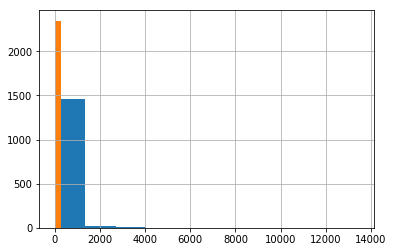

In [161]:
df[df['os_version']=='Android']['Distance'].hist()
df[df['os_version']=='iOS']['Distance'].hist();

новый план использовать перцентили в 25% 1 сигма

In [189]:
android_perc = np.percentile(df[df['os_version']=='iOS']['Distance'], 0.25)

In [190]:
android_perc

0.302907092710669

In [203]:
for col in df.columns:
    try:
        print(col, " iOS: ", np.percentile(df[df['os_version']=='iOS'][col], 0.25),  df[df['os_version']=='iOS'][col].std(),
              " Andr ", np.percentile(df[df['os_version']=='Android'][col], 0.25), df[df['os_version']=='Android'][col].std())
    except:
        continue

Id  iOS:  4227214.875 207853.33323305292  Andr  4307826.1875 181604.41328206583
IncomingTrackId  iOS:  15291633.5 1385129.066513388  Andr  15818107.325000001 1286150.8123154358
Distance  iOS:  0.302907092710669 61.896480500966724  Andr  0.26602683968759594 608.5062937465125
Duration  iOS:  0.78125 31.011622207378238  Andr  0.6158333333333333 31.237934670660426
AccelerationCount  iOS:  0.0 3.016041350095635  Andr  0.0 1.991039250549736
DecelerationCount  iOS:  0.0 3.591312056292645  Andr  0.0 2.173724818814765
Rating  iOS:  0.5937500223517418 1.1995616069118555  Andr  0.6499999761581421 1.1966573772001032
PhoneUsage  iOS:  0.0 6.604066865932752  Andr  0.0 2.1876958789030523
OriginChanged  iOS:  0.0 0.49390797167279216  Andr  0.0 0.4954950597241171
DistanceGPS  iOS:  0.24162499999999998 27.7209954469562  Andr  0.0385375 29.797149957583283
Urban  iOS:  0.0 0.4443246160887146  Andr  0.0 0.4714043100150824
RatingOverSpeed  iOS:  0.0 1.6506266367791018  Andr  0.0 1.8415346646813782
RatingAcc

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


KDeceleration  iOS:  nan 0.17517045256748845  Andr  nan 0.12365834983762297
MaxSpeed  iOS:  31.379201173782345 27.32559293701286  Andr  24.659811210632324 25.24504725347654
AverageSpeed  iOS:  12.021411640039391 17.26593727524422  Andr  6.171988263660448 17.549887058398415
PhoneUsageOverSpeed  iOS:  0.0 0.2204988362445673  Andr  0.0 0.14905669405962793
PhoneUsageKm  iOS:  0.0 2.392542556742235  Andr  0.0 1.5651003782371256
PhoneUsageOverSpeedKm  iOS:  0.0 0.34275737328031053  Andr  0.0 0.23764817297049776
KPhoneUsage  iOS:  nan 0.0  Andr  nan 0.05127631419158204
Prediction  iOS:  nan nan  Andr  nan nan
EcoScoringFuel  iOS:  0.0 47.72246616094555  Andr  0.0 47.14043100150788
EcoScoringTyres  iOS:  0.0 20.263536748640497  Andr  0.0 16.751819859436342
EcoScoringBrakes  iOS:  100.0 0.0  Andr  100.0 4.475114360915479
EcoScoringDepreciation  iOS:  0.0 37.71575848804625  Andr  0.0 38.52447210186046
EcoScoring  iOS:  6.25 34.93026510925747  Andr  6.25 33.653609780278835
Shared  iOS:  0.0 0.0  

In [ ]:
# DistanceGPS-NO, AverageSpeed - NO ,  CorneringDuration  - No

In [206]:
df[df['os_version']=='Android']['CorneringDuration'].describe()

count    1496.000000
mean        0.191176
std         1.710351
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        58.000000
Name: CorneringDuration, dtype: float64

In [207]:
df[df['os_version']=='iOS']['CorneringDuration'].describe()

count    2351.000000
mean        0.273926
std         4.809989
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       229.000000
Name: CorneringDuration, dtype: float64

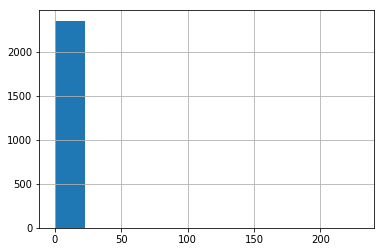

In [209]:
df[df['os_version']=='iOS']['CorneringDuration']

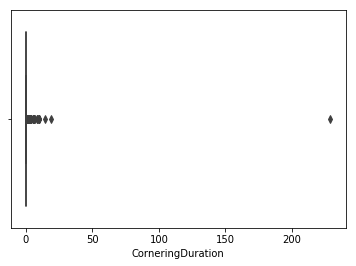

In [210]:
sns.boxplot(df[df['os_version']=='iOS']['CorneringDuration'])

In [211]:
df[df['os_version']=='Android']['CorneringDuration'].median()

0.0

In [212]:
df[df['os_version']=='iOS']['CorneringDuration'].median()

0.0

In [213]:
df[df['os_version']=='Android']['CorneringDuration'].value_counts()

0.0     1417
2.0       25
1.0       24
4.0        7
7.0        5
3.0        5
5.0        5
6.0        5
13.0       1
8.0        1
58.0       1
Name: CorneringDuration, dtype: int64

In [214]:
df[df['os_version']=='iOS']['CorneringDuration'].value_counts()

0.0      2165
1.0       117
2.0        24
3.0        16
6.0        13
4.0         4
10.0        4
5.0         2
8.0         2
229.0       1
9.0         1
19.0        1
14.0        1
Name: CorneringDuration, dtype: int64

In [76]:
os.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4416 entries, 0 to 4415
Data columns (total 2 columns):
DeviceToken    4416 non-null object
os_version     4416 non-null object
dtypes: object(2)
memory usage: 69.1+ KB


In [11]:
rich_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 64 columns):
Id                        4000 non-null int64
TrackToken                4000 non-null object
DeviceToken               4000 non-null object
IncomingTrackId           4000 non-null int64
StartDate                 4000 non-null object
EndDate                   4000 non-null object
Distance                  4000 non-null float64
Duration                  4000 non-null float64
AccelerationCount         4000 non-null int64
DecelerationCount         4000 non-null int64
Rating                    4000 non-null float64
PhoneUsage                4000 non-null float64
TrackOrigin               4000 non-null object
OriginChanged             4000 non-null bool
AddressStart              3999 non-null object
AddressFinish             3999 non-null object
DistanceGPS               4000 non-null float64
Urban                     4000 non-null bool
Region                    2824 non-null object
Cou

In [24]:
corr_val = rich_tracks.corr().abs()


In [45]:
indices = np.where(corr_val > 0.5)
indices = [(corr_val.index[x], corr_val.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]